# Projek Akhir Praktikum Kecerdasan Buatan
## Klasifikasi Pakaian

**Anggota Kelompok:**
- 2009106051 - Ferry Fathurrahman
- 2009106053 - Duta Vira Pradhana Dipa
- 2009106085 - Tegar Fitrah Naba Atthoriq

---

### Import Library



In [58]:
import os

import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

---

### Preprocessing

Menentukan *directory* dari *dataset* yang akan dilatih.

In [3]:
base_path = r'.\dataset'

Melakukan pemisahan data *training*, *validation*, dan *testing* dengan rasio 8:1:1 dan disimpan di folder "split_dataset".

In [4]:
splitfolders.ratio(
    base_path,
    output='split_dataset',
    ratio=(.8,.1,.1)
)

Copying files: 10959 files [00:13, 814.14 files/s]


Menentukan *directory* dari data *training*, *validation*, dan *testing*, kemudian menampilkan semua *class* / folder di dalamnya.

In [68]:
train_path = 'split_dataset/train'
validation_path = 'split_dataset/val'
test_path = 'split_dataset/test'

os.listdir(validation_path)

['black_dress',
 'black_pants',
 'black_shirt',
 'black_shoes',
 'black_shorts',
 'blue_dress',
 'blue_pants',
 'blue_shirt',
 'blue_shoes',
 'blue_shorts',
 'brown_pants',
 'brown_shoes',
 'brown_shorts',
 'green_pants',
 'green_shirt',
 'green_shoes',
 'green_shorts',
 'red_dress',
 'red_pants',
 'red_shoes',
 'white_dress',
 'white_pants',
 'white_shoes',
 'white_shorts']

Membuat generator untuk augmentasi pada data *training* dan *validation*. Untuk data *training*, parameter yang ditambahkan adalah rotasi, *shearing* (memiringkan), *zooming*, dan *flipping* secara horizontal.

In [44]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

Men-*generate* data augmentasi.

In [45]:
train_image = train_datagen.flow_from_directory(
    train_path,
    target_size=(200, 200),
    classes=['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts',
    'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts',
    'brown_pants', 'brown_shoes', 'brown_shorts',
    'green_dress', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts',
    'red_dress', 'red_pants', 'red_shoes',
    'white_dress', 'white_pants', 'white_shoes', 'white_shorts'
    ],
    class_mode='categorical',
    batch_size=32
)

validation_image = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(200, 200),
    classes=['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts',
    'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts',
    'brown_pants', 'brown_shoes', 'brown_shorts',
    'green_dress', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts',
    'red_dress', 'red_pants', 'red_shoes',
    'white_dress', 'white_pants', 'white_shoes', 'white_shorts'],
    class_mode='categorical',
    batch_size=32
)

test_image = test_datagen.flow_from_directory(
    test_path,
    target_size=(200, 200),
    classes=['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts',
    'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts',
    'brown_pants', 'brown_shoes', 'brown_shorts',
    'green_dress', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts',
    'red_dress', 'red_pants', 'red_shoes',
    'white_dress', 'white_pants', 'white_shoes', 'white_shorts'],
    class_mode='categorical',
    batch_size=32
)

Found 8760 images belonging to 25 classes.
Found 1087 images belonging to 25 classes.
Found 1112 images belonging to 25 classes.


---

### Visualisasi Dataset

Menampilkan 10 data citra hasil *preprocessing*.

(32, 200, 200, 3)


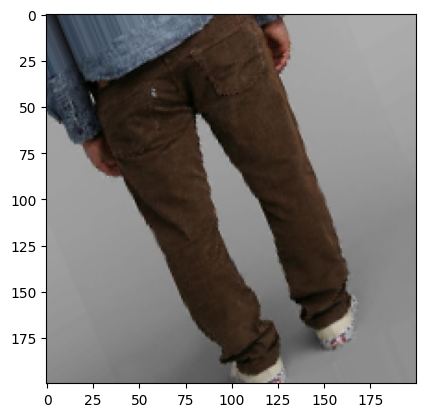

(32, 200, 200, 3)


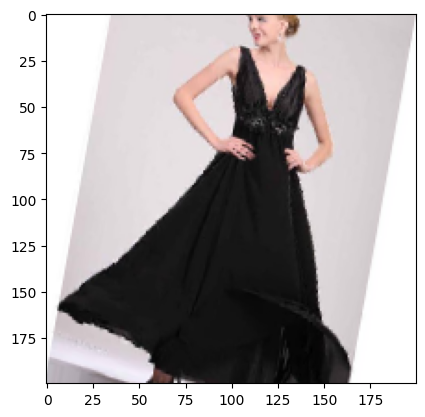

(32, 200, 200, 3)


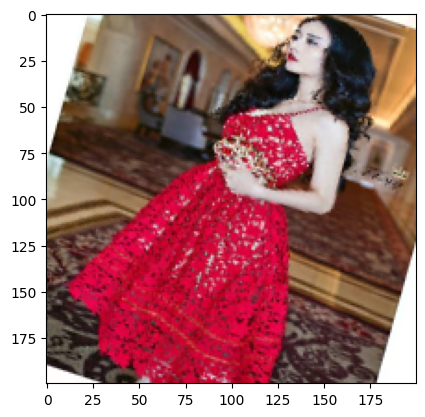

(32, 200, 200, 3)


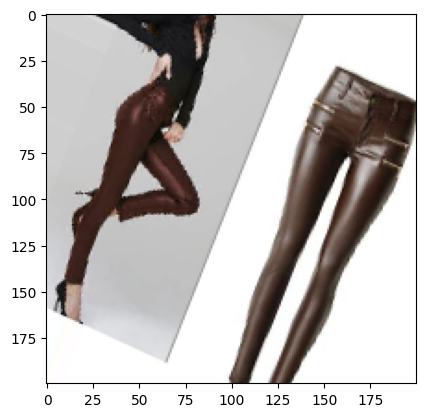

(32, 200, 200, 3)


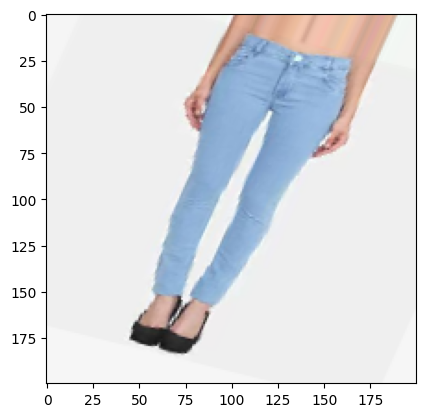

(32, 200, 200, 3)


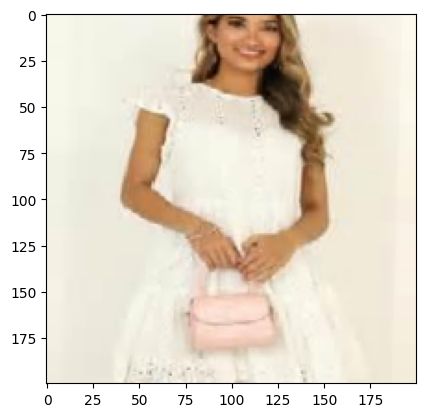

(32, 200, 200, 3)


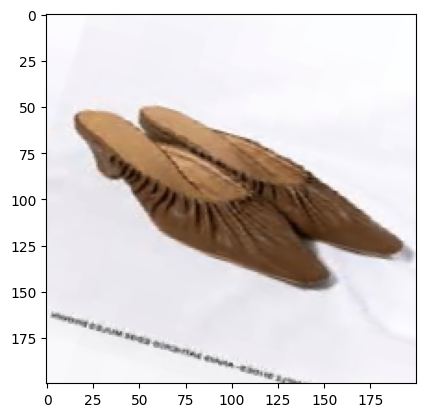

(32, 200, 200, 3)


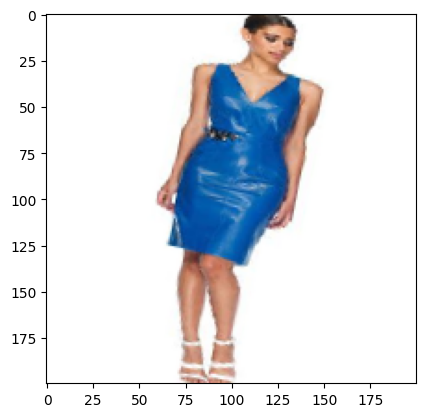

(32, 200, 200, 3)


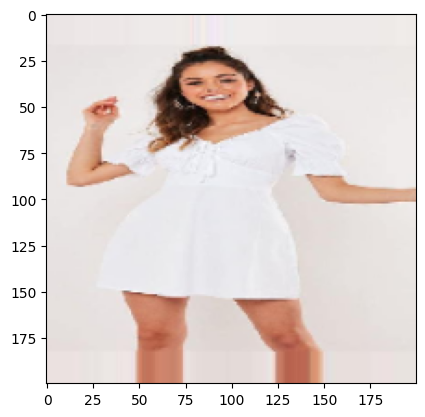

(32, 200, 200, 3)


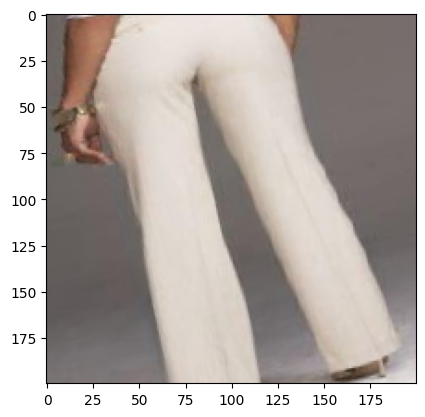

In [46]:
for _ in range(10):
    img, label = train_image.next()
    print(img.shape)
    plt.imshow(img[1])
    plt.show()

---

### Modeling dan Training

Melakukan penyusunan *layers neural network* untuk model.

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=[200,200,3]),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])

Menampilkan ringkasan dari jaringan syaraf yang sebelumnya sudah dibuat.

In [48]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 73728)             0         
                                                                 
 dense_16 (Dense)            (None, 64)               

Melakukan *compiling* pada model dengan menentukan *optimizer*, fungsi *loss*, dan metrik yang akan ditampilkan.

In [49]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

Melakukan *fitting* pada model.

In [50]:
result = model.fit(
    train_image,
    epochs=20,
    validation_data=validation_image,
    steps_per_epoch=100
)

Epoch 1/20
100/100 [==============================] - 41s 404ms/step - loss: 2.2557 - accuracy: 0.3860 - val_loss: 1.3181 - val_accuracy: 0.6302
Epoch 2/20
100/100 [==============================] - 40s 400ms/step - loss: 1.2074 - accuracy: 0.6375 - val_loss: 1.0130 - val_accuracy: 0.7010
Epoch 3/20
100/100 [==============================] - 40s 396ms/step - loss: 1.0252 - accuracy: 0.6801 - val_loss: 0.7924 - val_accuracy: 0.7608
Epoch 4/20
100/100 [==============================] - 40s 395ms/step - loss: 0.8851 - accuracy: 0.7253 - val_loss: 0.7066 - val_accuracy: 0.7856
Epoch 5/20
100/100 [==============================] - 37s 369ms/step - loss: 0.8259 - accuracy: 0.7334 - val_loss: 0.7214 - val_accuracy: 0.7737
Epoch 6/20
100/100 [==============================] - 34s 338ms/step - loss: 0.7196 - accuracy: 0.7784 - val_loss: 0.7065 - val_accuracy: 0.7820
Epoch 7/20
100/100 [==============================] - 34s 335ms/step - loss: 0.6962 - accuracy: 0.7769 - val_loss: 0.6555 - val_ac

---

### Visualisasi Hasil

Menyimpan hasil *fitting* ke dalam variabel, dan menghitung jumlah *epochs*-nya.

In [51]:
accuracy_train = result.history['accuracy']
loss_train = result.history['loss']

accuracy_val = result.history['val_accuracy']
loss_val = result.history['val_loss']

x_length = range(len(accuracy_train))

Menampilkan visualisasi hasil akurasi dan loss

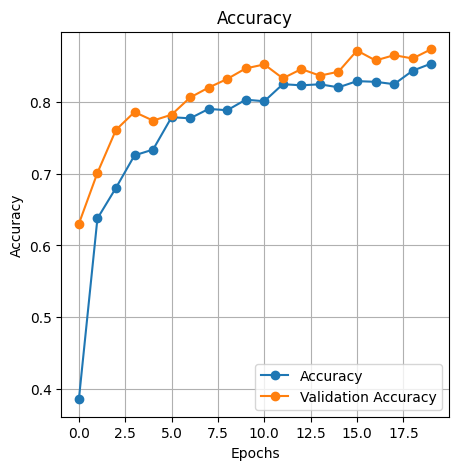

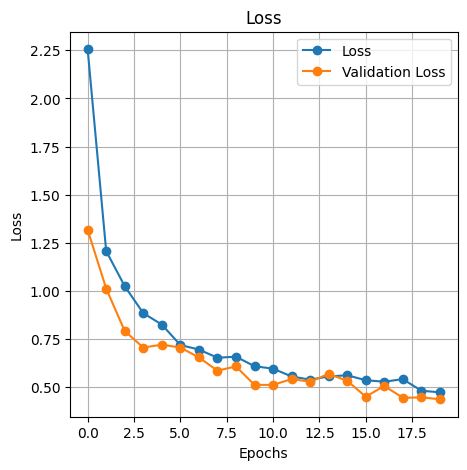

In [52]:
plt.figure(1, figsize=(5, 5))
plt.plot(x_length, accuracy_train, "o-", label="Accuracy")
plt.plot(x_length, accuracy_val, "o-", label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.grid()

plt.figure(2, figsize=(5, 5))
plt.plot(x_length, loss_train, "o-", label="Loss")
plt.plot(x_length, loss_val, "o-", label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.grid()

Menampilkan hasil evaluasi

In [57]:
test_eval = model.evaluate(test_image)

print(f'Test Loss   : {round(test_eval[0], 2)}')
print(f'Test Acc    : {round(test_eval[1] * 100, 2)}%')

35/35 [==============================] - 2s 66ms/step - loss: 0.4744 - accuracy: 0.8516
Test Loss   : 0.47
Test Acc    : 85.16%


Menyimpan label-label

In [69]:
class_names = ['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts',
    'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts',
    'brown_pants', 'brown_shoes', 'brown_shorts',
    'green_dress', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts',
    'red_dress', 'red_pants', 'red_shoes',
    'white_dress', 'white_pants', 'white_shoes', 'white_shorts'
    ]

Menampilkan beberapa gambar, label, dan prediksi terhadapnya

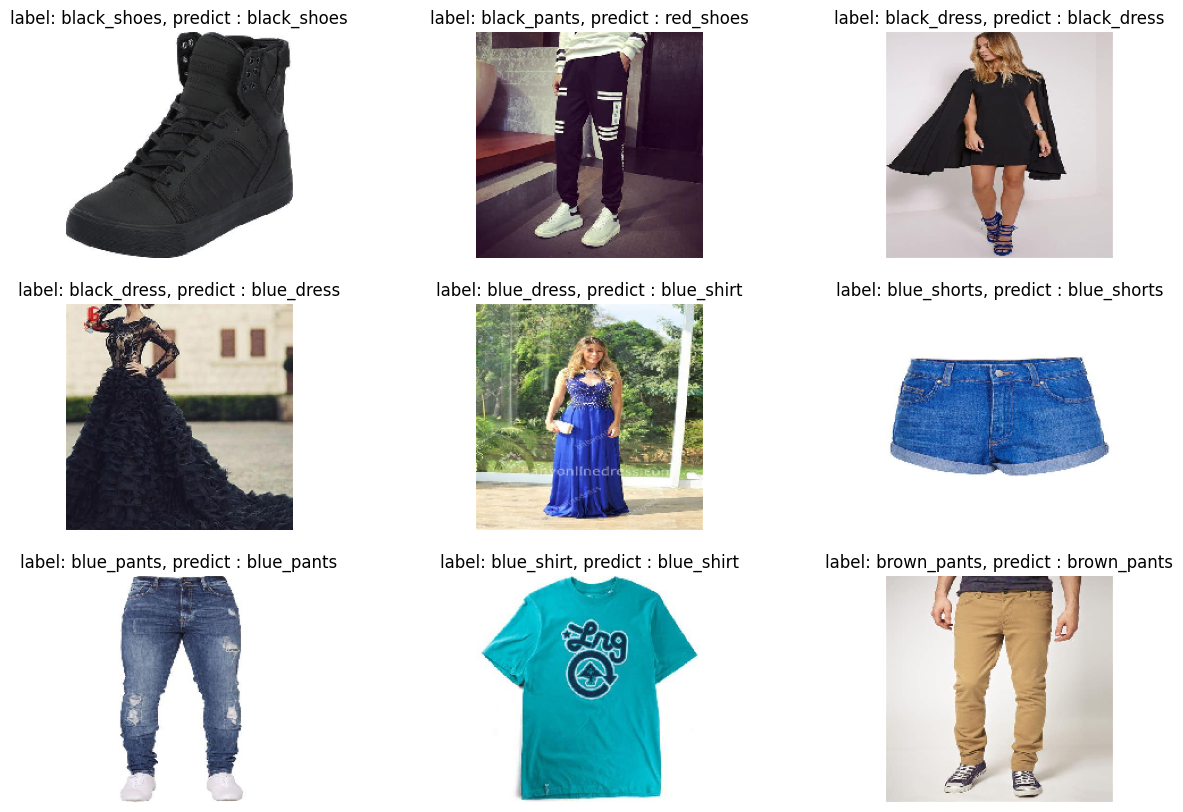

In [70]:
img, label = next(iter(test_image))

plt.figure(figsize=(15,10))
for i in range(9) :
    actual_label = class_names[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(img[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(img[i]))
    plt.title(f'label: {actual_label}, predict : {class_names[y_pred]}')

---